In [149]:
!pip install tensorflow==2.10 tensorflow-gpu==2.10 pandas scikit-learn seaborn

You should consider upgrading via the 'E:\TFlow\venv_tf_gpu\Scripts\python.exe -m pip install --upgrade pip' command.


In [150]:
import tensorflow as tf

In [151]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Load data

In [152]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, classification_report

In [153]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Link data: http://yann.lecun.com/exdb/mnist/
X_train = X_train/255.0
X_test = X_test/255.0

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

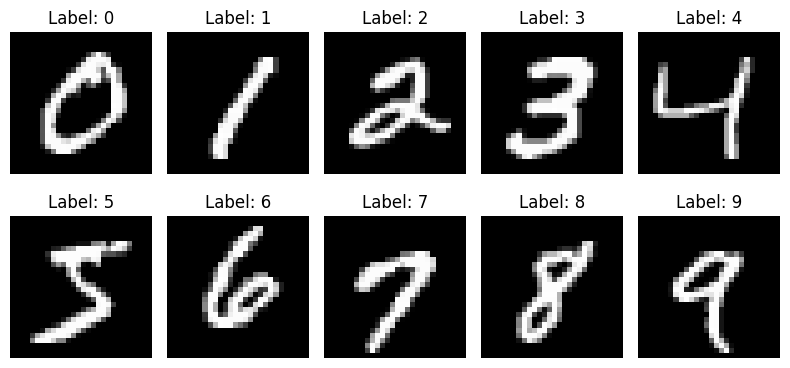

In [154]:
fig, axes = plt.subplots(2, 5, figsize=(8, 4))

for label in range(10):
    row = label // 5
    col = label % 5

    image_for_label = X_train[y_train == label][0]

    axes[row, col].imshow(image_for_label, cmap='gray')
    axes[row, col].axis('off')
    axes[row, col].set_title(f"Label: {label}")

plt.tight_layout()
plt.show()

In [155]:
X_train_vecto = X_train.reshape(60000, 784)
X_test_vecto = X_test.reshape(10000, 784)
X_vecto = X.reshape(70000, 784)

In [156]:
# Giảm dữ liệu về 2 chiều
pca_2 = PCA(n_components=2)
X_2D = pca_2.fit_transform(X_vecto)

In [157]:
explained_variance_ratio = pca_2.explained_variance_ratio_
total_variance_ratio = np.sum(explained_variance_ratio)
print(total_variance_ratio)

0.16901560507685714


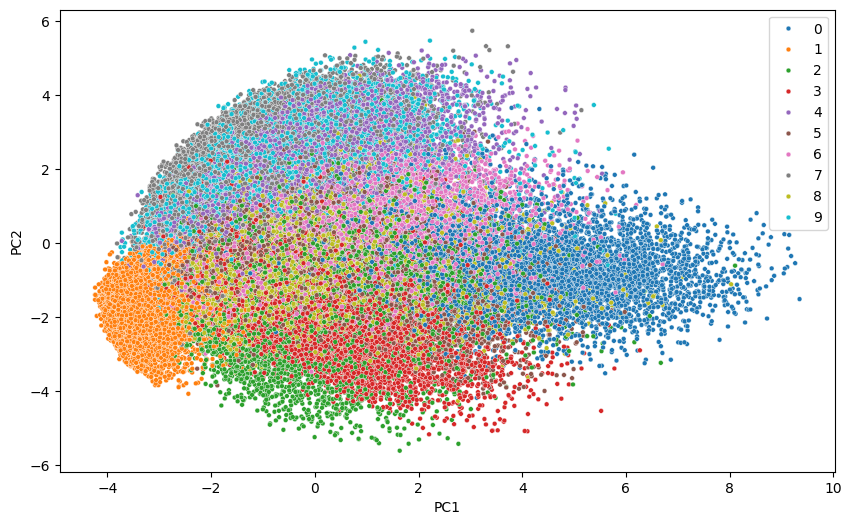

In [158]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_2D[:, 0], y=X_2D[:, 1], hue=y, palette='tab10', s=12)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Clustering

In [159]:
# Trực quan phân cụm dữ liệu
def kmeans_display(X, label, centers):
    K = len(centers)

    plt.figure(figsize=(10,6))
    markers = plt.Line2D.markers.keys()
    markers = list(markers)
    for k in range(K):
        Xk = X[label == k, :]
        plt.scatter(Xk[:, 0], Xk[:, 1], marker = markers[k], color=sns.color_palette('tab10')[k], label=f'Cluster {k}', s=12)

    for i, center in enumerate(centers):
        plt.scatter(center[0], center[1], marker = markers[i], color='black', s=100)

    plt.legend()
    plt.title('KMeans Clustering')
    plt.show()

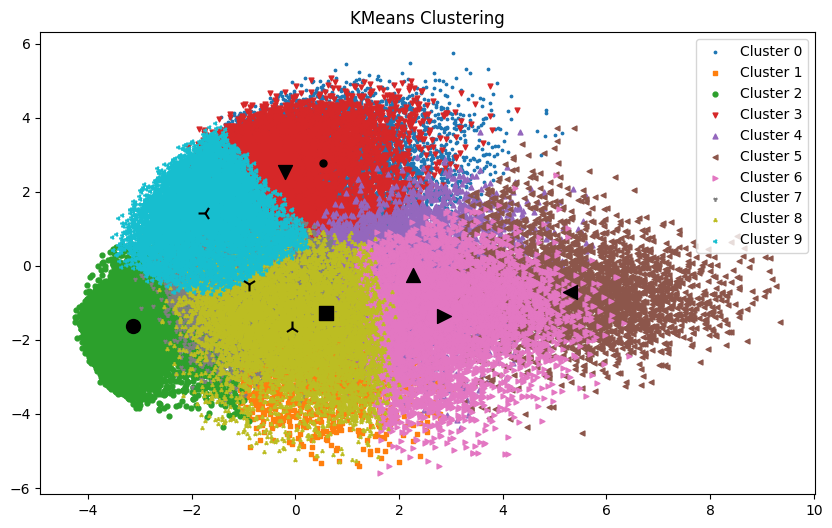

In [160]:
from sklearn.cluster import KMeans

pca_3 = PCA(n_components=3)
X_3D = pca_3.fit_transform(X_vecto)

k = KMeans(n_clusters=10).fit(X_3D)
cluster_labels = k.predict(X_3D)

cluster_centers = k.cluster_centers_

kmeans_display(X_3D, cluster_labels, cluster_centers)

In [161]:
# Xây dựng mô hình CNN
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(10, activation='softmax')
])

model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 1, 1, 128)       

# Training

In [162]:
history = model_cnn.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=10,
    verbose=1)

Epoch 1/10
469/469 [==============================] - 5s 9ms/step - loss: 0.3605 - accuracy: 0.8851 - val_loss: 0.0924 - val_accuracy: 0.9709
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0994 - accuracy: 0.9704 - val_loss: 0.0611 - val_accuracy: 0.9817
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0726 - accuracy: 0.9786 - val_loss: 0.0629 - val_accuracy: 0.9818
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0566 - accuracy: 0.9836 - val_loss: 0.0492 - val_accuracy: 0.9853
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0465 - accuracy: 0.9860 - val_loss: 0.0448 - val_accuracy: 0.9865
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0400 - accuracy: 0.9880 - val_loss: 0.0394 - val_accuracy: 0.9885
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0342 - accuracy: 0.9898 - val_loss: 0.0446 - val_accuracy: 0.9865
Epoch 

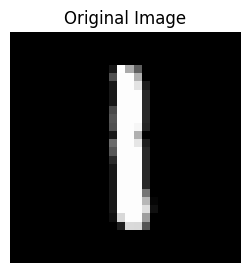

1/1 [==============================] - 0s 96ms/step


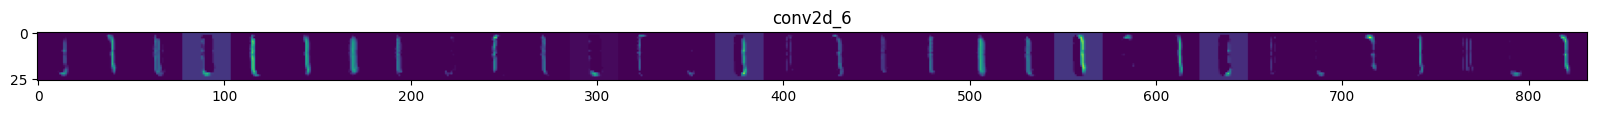

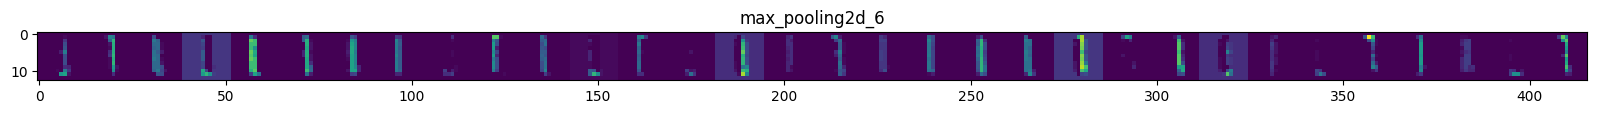

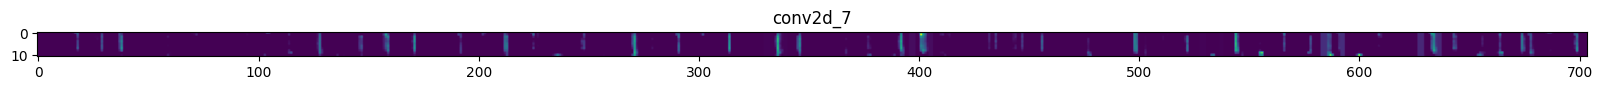

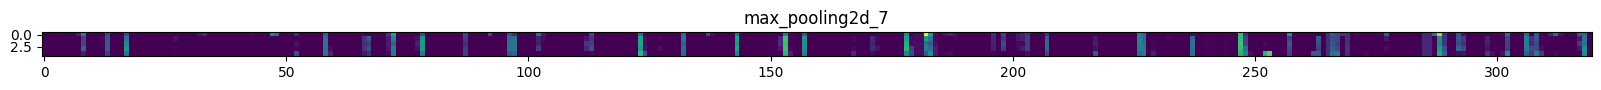

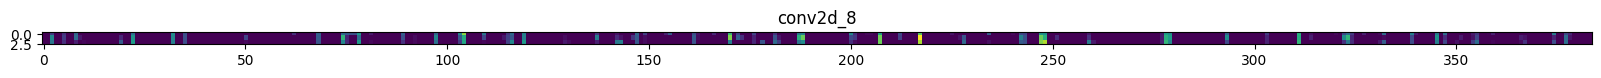

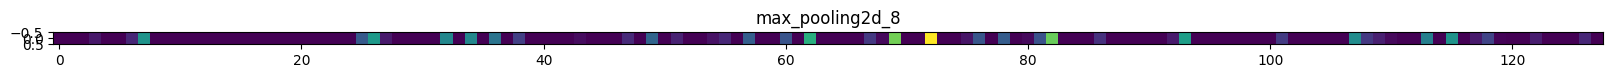

In [163]:
random_image_index = np.random.randint(0, len(X_train))
random_image = X_train[random_image_index].reshape((1, 28, 28, 1))

def preprocess_and_display(image):
    image = image.reshape(28, 28)
    plt.figure(figsize=(3,3))
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.show()

preprocess_and_display(random_image[0])

successive_outputs = [layer.output for layer in model_cnn.layers]
visualization_model = tf.keras.models.Model(inputs=model_cnn.inputs, outputs=successive_outputs)
successive_feature_maps = visualization_model.predict(random_image)
layer_names = [layer.name for layer in model_cnn.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):

    if len(feature_map.shape) == 4:

        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        display_grid = np.zeros((size, size * n_features))

        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size: (i + 1) * size] = x

        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

Text(0.5, 1.0, 'Training and validation loss')

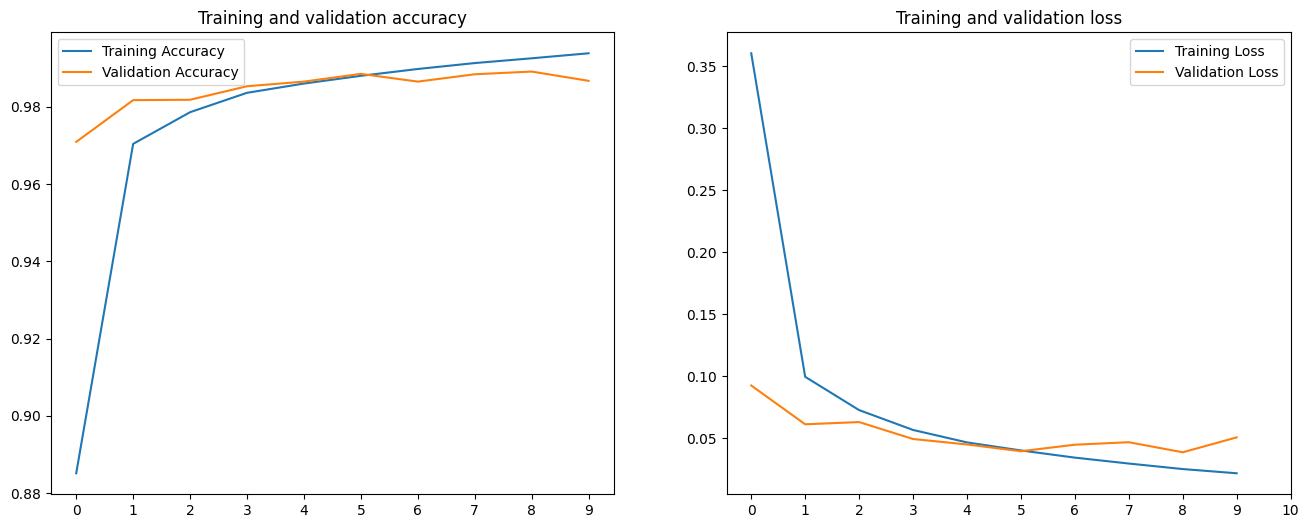

In [164]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(acc)

plt.figure(figsize=(16, 6))

# Đồ thị accuracy trên tập train và tập validation
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xticks(range(0, epochs, 1))
plt.legend()

# Đồ thị hàm loss trên tập train và tập validation
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xticks(range(0, epochs+1, 1))
plt.legend()
plt.title('Training and validation loss')

# Test 

In [165]:
y_pred = np.argmax(model_cnn.predict(X_test), axis = 1)

print("Accuracy (CNN): ", accuracy_score(y_test, y_pred))
print("Precision (CNN) (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (CNN) (macro):", recall_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

313/313 [==============================] - 1s 1ms/step
Accuracy (CNN):  0.9867
Precision (CNN) (macro): 0.9869272067471601
Recall (CNN) (macro): 0.9865100908807358
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.97      1.00      0.98       982
           5       0.99      0.98      0.99       892
           6       1.00      0.98      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



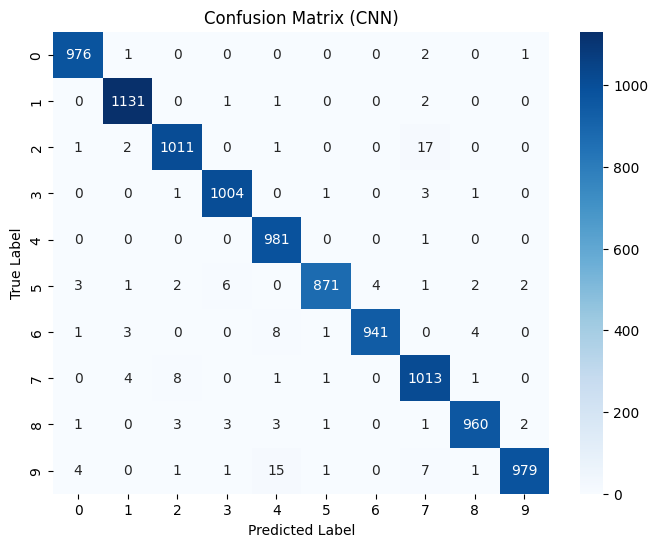

In [166]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix (CNN)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Test with an image 

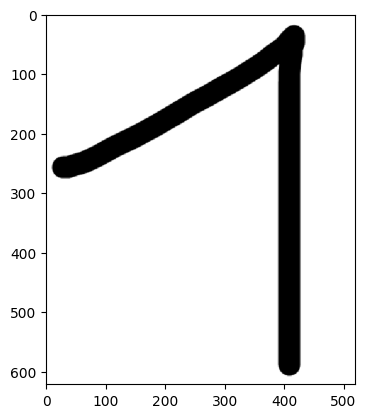

In [167]:
import cv2
test_image = cv2.imread('test_1.png')
# gray_image = cv2.bitwise_not(cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY))

plt.imshow(test_image, cmap='gray')

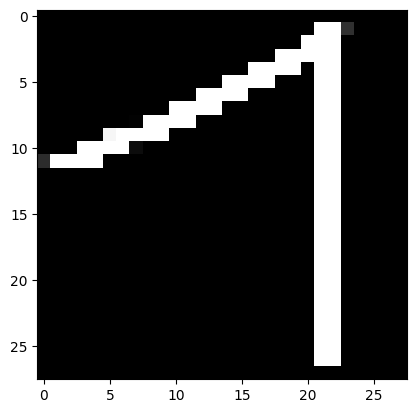

In [168]:
resize_test_image = cv2.resize(gray_image, (28,28))
plt.imshow(resize_test_image, cmap='gray')

In [169]:
test_image_pred = np.argmax(model_cnn.predict(np.expand_dims(resize_test_image,0)), axis = 1)
print("Test image: ", test_image_pred[0])

1/1 [==============================] - 0s 77ms/step
Test image:  1


# Save model

In [170]:
from tensorflow.keras.models import load_model
model_cnn.save('digits_recognition.keras')